In [1]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import glob

In [2]:
band2R = '/Users/Airton/Desktop/b2sparseless/results/weather/test_latest/images/*real_B.png'
band2F = '/Users/Airton/Desktop/b2sparseless/results/weather/test_latest/images/*fake_B.png'
band6R = '/Users/Airton/Desktop/band6/results_test/weather/test_latest/images/*real_B.png'
band6F = '/Users/Airton/Desktop/band6/results_test/weather/test_latest/images/*fake_B.png'
visR = '/Users/Airton/Desktop/visibility/results_test/weather/test_latest/images/*real_B.png'
visF = '/Users/Airton/Desktop/visibility/results_test/weather/test_latest/images/*fake_B.png'
rhumidR = '/Users/Airton/Desktop/RHumid/results_test/weather/test_latest/images/*real_B.png'
rhumidF = '/Users/Airton/Desktop/RHumid/results_test/weather/test_latest/images/*fake_B.png'
shumidR = '/Users/Airton/Desktop/SHumid/results_test/weather/test_latest/images/*real_B.png'
shumidF = '/Users/Airton/Desktop/SHumid/results_test/weather/test_latest/images/*fake_B.png'
tempR = '/Users/Airton/Desktop/Temp/results_test/weather/test_latest/images/*real_B.png'
tempF = '/Users/Airton/Desktop/Temp/results_test/weather/test_latest/images/*fake_B.png'

In [3]:
MSE = [] 
SSIM =[]

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [29]:
run1R = []
for filename in sorted(glob.glob(tempR)):
    im=Image.open(filename).convert('L')
    run1R.append(im)

In [30]:
run1F = []
for filename in sorted(glob.glob(tempF)):
    im=Image.open(filename).convert('L')
    run1F.append(im)

In [31]:
print(len(run1F))
print(len(run1R))

50
50


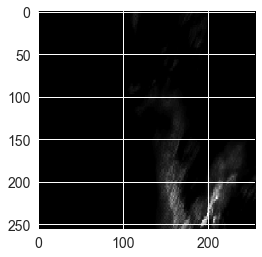

In [32]:
plt.imshow(np.array(run1R[0]),cmap='gray')
plt.show()

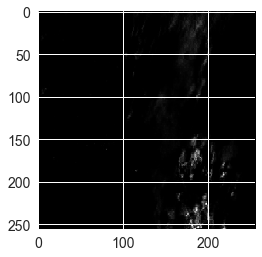

In [33]:
plt.imshow(np.array(run1F[0]),cmap='gray')
plt.show()

In [34]:
MSE = []
SSIM = []
for i in range(len(run1R)):
    m = mse(np.array(run1R[i]),np.array(run1F[i]))
    s = ssim(np.array(run1R[i]),np.array(run1F[i]))
    MSE.append(m)
    SSIM.append(s)

In [35]:
print(MSE)

[344.3911895751953, 249.97190856933594, 63.77488708496094, 142.55384826660156, 77.16107177734375, 140.0255126953125, 87.75349426269531, 179.73350524902344, 179.24172973632812, 341.5625915527344, 124.47813415527344, 280.0812683105469, 320.0632781982422, 568.9537811279297, 106.45664978027344, 173.2666778564453, 281.9252166748047, 263.96665954589844, 175.5854034423828, 369.7062530517578, 272.1159973144531, 210.86581420898438, 287.2921600341797, 208.88616943359375, 224.81362915039062, 233.44969177246094, 327.51922607421875, 202.7304229736328, 278.1206359863281, 224.4975128173828, 79.66900634765625, 140.50975036621094, 136.968505859375, 213.57540893554688, 170.16163635253906, 51.38618469238281, 90.27531433105469, 157.3799591064453, 305.97418212890625, 338.726806640625, 255.9821014404297, 265.5899963378906, 180.76284790039062, 141.07681274414062, 129.11236572265625, 109.81683349609375, 185.73416137695312, 86.83889770507812, 106.59255981445312, 128.5727996826172]


In [36]:
print(SSIM)

[0.7466997461806005, 0.8332435345824253, 0.8937035391851915, 0.8876455650475275, 0.9421472322326966, 0.9023769785033751, 0.8245240922988825, 0.7970233622614711, 0.8070885659175192, 0.7895472647340407, 0.7983639109159834, 0.8602404042211275, 0.7845343020057706, 0.7375440831610105, 0.9005747413173523, 0.7924575786836882, 0.7862121182302265, 0.8559150937200996, 0.8145575025061389, 0.8380667315838544, 0.8474519771232406, 0.90241952833288, 0.8979323640212153, 0.8576505504397256, 0.8316139350514665, 0.811031909226581, 0.818965967705488, 0.8259526651527217, 0.8974442446010733, 0.8723664950963151, 0.863687208289813, 0.7970807163296082, 0.8858193013911854, 0.8279834444175161, 0.8227634841171382, 0.8241175345655484, 0.7642503720550226, 0.8348396403889062, 0.755055493514909, 0.775756914504309, 0.7902091451562964, 0.7729064898184984, 0.8226309769511103, 0.7392584225380282, 0.7844548489577137, 0.8449573807781917, 0.8160317466378666, 0.8115454333185835, 0.7969126067538713, 0.8460879305480271]


In [37]:
x=list(range(0,50))

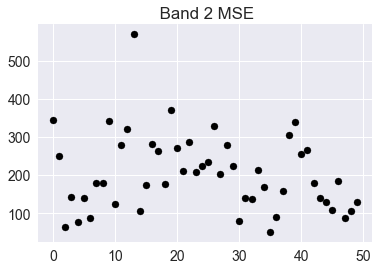

51.38618469238281 568.9537811279297
204.31300903320312


In [38]:
plt.scatter(x,MSE,c='black')
plt.title(" Band 2 MSE")
plt.show()
print(min(MSE),max(MSE))
print(np.mean(MSE))

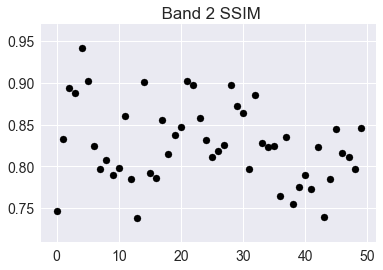

0.7375440831610105 0.9421472322326966
0.8266329015014366


In [39]:
plt.scatter(x,SSIM,c='black')
plt.title(" Band 2 SSIM")
plt.show()
print(min(SSIM),max(SSIM))
print(np.mean(SSIM))

In [40]:
from sklearn.metrics import confusion_matrix

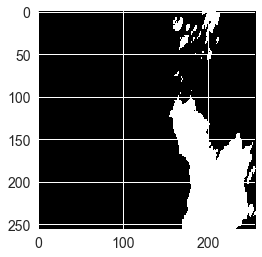

In [41]:
Thr = cv2.threshold(np.array(run1R[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thr[1],cmap = 'gray')
plt.show()

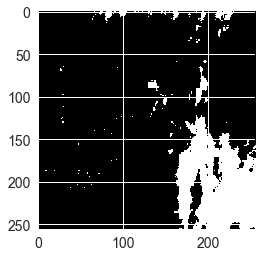

In [42]:
Thf = cv2.threshold(np.array(run1F[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thf[1],cmap = 'gray')
plt.show()

In [43]:
Fthr = []
Fthf = []
for i in range(len(run1R)):
    gray_img= np.array(run1R[i])
    gray_img2= np.array(run1F[i])
    th1 = cv2.threshold(gray_img,1,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(gray_img2,1,255,cv2.THRESH_BINARY)
    Fr = list(th1[1].flatten())
    Ff = list(th2[1].flatten())
    Fthr.append(Fr)
    Fthf.append(Ff)

In [44]:
TN,FP,FN,TP = 0,0,0,0
TN1,FP1,FN1,TP1 = 0,0,0,0

In [45]:
for i in range(len(Fthr)):
    tn,fp,fn,tp=confusion_matrix(Fthr[i], Fthf[i]).ravel()
    TN = TN +tn
    FP = FP +fp
    FN = FN +fn
    TP = TP +tp

In [46]:
Total = TN+FP+FN+TP
TotalP = FN + TP
TotalN = TN + FP
PTN = (TN/Total)*100
PFP = (FP/Total)*100
PFN = (FN/Total)*100
PTP = (TP/Total)*100
To1 = FN + TN
To2 = TP + FP

In [47]:
PTC = []

In [48]:
PTC.append([PTN,PFP,PFN,PTP])

In [49]:
print(len(PTC))
print(PTC)

1
[[82.63192749023438, 7.608245849609376, 4.53594970703125, 5.223876953125]]


In [50]:
Correct = PTN + PTP
Wrong = PFN + PFP
print("Correct = ", Correct, " Wrong = ", Wrong)

Correct =  87.85580444335938  Wrong =  12.144195556640625


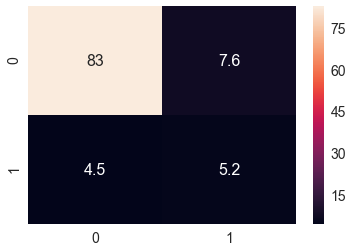

In [51]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFP],
        [PFN,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

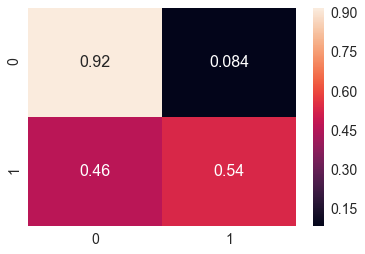

In [52]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/TotalN,FP/TotalN],
        [FN/TotalP,TP/TotalP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

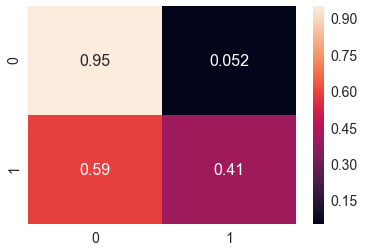

In [53]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/To1,FN/To1],
        [FP/To2,TP/To2]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size